# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [2]:
# Importar o arquivo do desktop
from google.colab import files

In [3]:
# Fazer o upload do arquivo
uploaded = files.upload()

Saving MODULO7_PROJETOFINAL_BASE_SUPERMERCADO - MODULO7_PROJETOFINAL_BASE_SUPERMERCADO (1).csv.csv to MODULO7_PROJETOFINAL_BASE_SUPERMERCADO - MODULO7_PROJETOFINAL_BASE_SUPERMERCADO (1).csv.csv


In [4]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO - MODULO7_PROJETOFINAL_BASE_SUPERMERCADO (1).csv.csv")

display(df.head(10))

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [5]:
#Seu código aqui para a média
preco_normal_media = df.groupby('Categoria')['Preco_Normal'].mean().reset_index()
print(preco_normal_media)

                    Categoria  Preco_Normal
0  belleza-y-cuidado-personal   1783.556485
1          comidas-preparadas   3095.043478
2                  congelados   2108.042553
3                      frutas   1724.473684
4        instantaneos-y-sopas    765.491228
5                     lacteos   2385.219239
6                    verduras   1343.296875


In [6]:
#Seu código aqui para a mediana
preco_normal_mediana = df.groupby('Categoria')['Preco_Normal'].median().reset_index()
print(preco_normal_mediana)

                    Categoria  Preco_Normal
0  belleza-y-cuidado-personal        1569.0
1          comidas-preparadas        3290.0
2                  congelados        1519.0
3                      frutas        1195.0
4        instantaneos-y-sopas         439.0
5                     lacteos         989.0
6                    verduras        1180.0


Digite aqui as categorias:
- Valores de media acima da mediana: belleza-y-cuidado-personal, congelados, frutas, instantaneos-y-sopas, lacteos e verduras.
- Valores de media abaixo da mediana: comidas-preparadas.

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [7]:
#Seu código aqui
categoria_desvio = df.groupby('Categoria')['Preco_Normal'].std().reset_index()
print(categoria_desvio)

                    Categoria  Preco_Normal
0  belleza-y-cuidado-personal   2210.041719
1          comidas-preparadas   2019.911428
2                  congelados   2111.539896
3                      frutas   1639.151114
4        instantaneos-y-sopas   1170.232869
5                     lacteos   3925.816164
6                    verduras   1012.699625


Digite nesse campo o comportamento que você identificou.
- As categorias com maior desvio padrão são: lacteos, belleza-y-cuidado-personal e congelados.
- Nessas categorias, a média tende a ser mais alta que a mediana, indicando a presença de outliers (valores extremos) — produtos com preços muito acima dos demais que puxam a média para cima. Isso é típico de categorias com grande variedade de produtos, como cosméticos e laticínios, onde há tanto itens baratos quanto produtos premium de alto valor.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

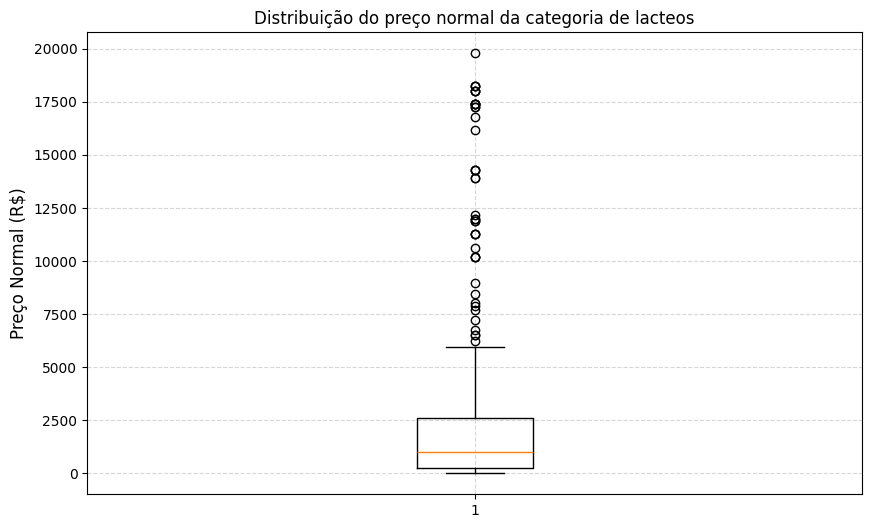

In [8]:
#Seu código aqui
plt.figure(figsize=(10, 6))
plt.boxplot(df.loc[df['Categoria'] == 'lacteos']['Preco_Normal'])
plt.title('Distribuição do preço normal da categoria de lacteos', fontsize=12)
plt.ylabel('Preço Normal (R$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

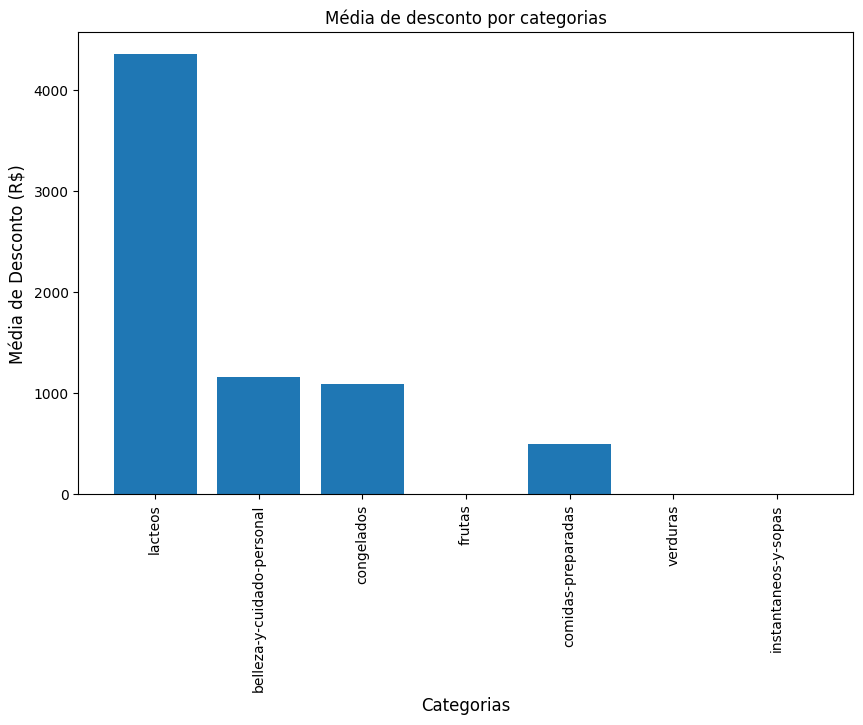

In [9]:
#Seu código aqui
plt.figure(figsize=(10, 6))
plt.bar(df['Categoria'], df['Desconto'])
plt.title('Média de desconto por categorias', fontsize=12)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Média de Desconto (R$)', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [22]:
#Seu código aqui
df_grupo_filtrado = df[df['Desconto'] > 0]
df_media = df_grupo_filtrado.groupby(['Categoria', 'Marca'])['Desconto'].agg(
    Média='mean',
    Desvio_padrão='std',
    Contagem='count'
).reset_index()
fig = px.treemap(df_media, path=['Categoria', 'Marca'],
                 values='Média',
                 color='Média',
                 color_continuous_scale='Viridis',
                 title= 'Media de desconto por categoria e marca (Excluindo grupos sem descontos)',
                 hover_data={
                     'Média': ':.2f',
                     'Desvio_padrão': ':.2f',
                     'Contagem': True
                     }
                 )
fig.show()